# Data description:

This data set has records of 1000 client. It has 17 categorical independant variables, 3 continuous variables, and 1 binomial target variable. Target variable is "Has the credit contract been complied with (good, 1) or not (bad, 0)?"

In [1]:
from sandbox_functions import create_data, create_balanced_sample, assign_categorical_levels, verify_sample_belongs_to_population, standardize_continuous_variables, remove_outliers, principal_components_analysis, get_representative_vars_by_pca

credit_data = create_data()

Data has been created, regarding categorical values as original categories. Numbers have been replaced with strings in order to work with categories. Further, the colnames where replaced with english translation. This data has a shape of 1000 rows and 21 columns. And it has oversampling of good credits (700) against bad credits (300).

<AxesSubplot:>

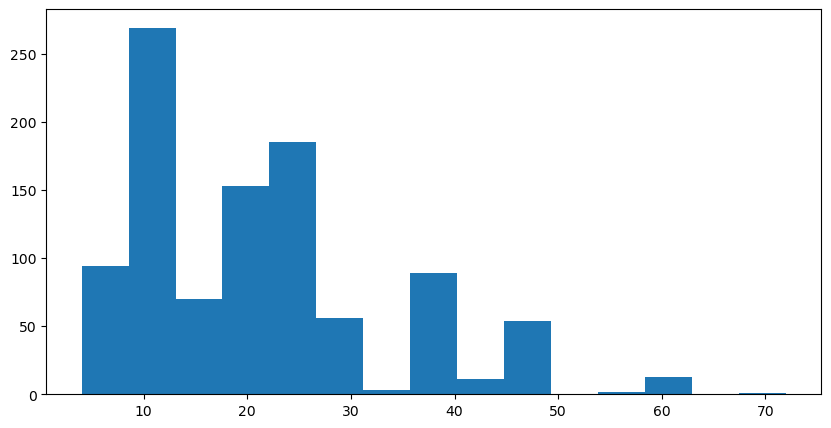

In [2]:
credit_data.duration.hist(figsize=(10, 5), grid=False, bins=15)

<AxesSubplot:>

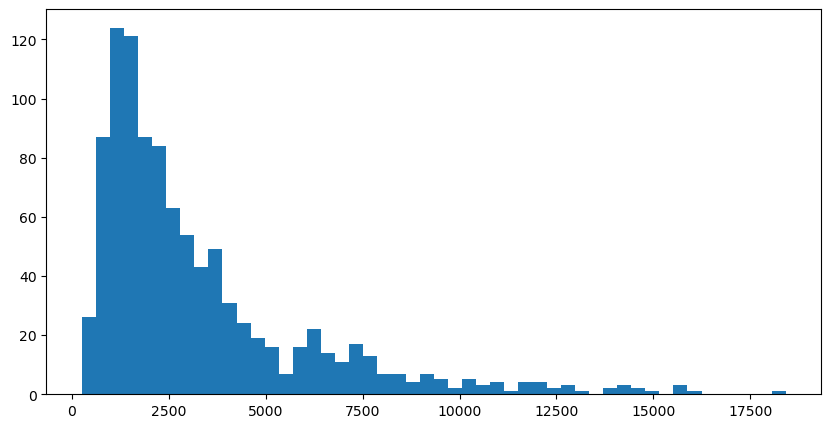

In [3]:
credit_data.amount.hist(figsize=(10, 5), grid=False, bins=50)

<AxesSubplot:>

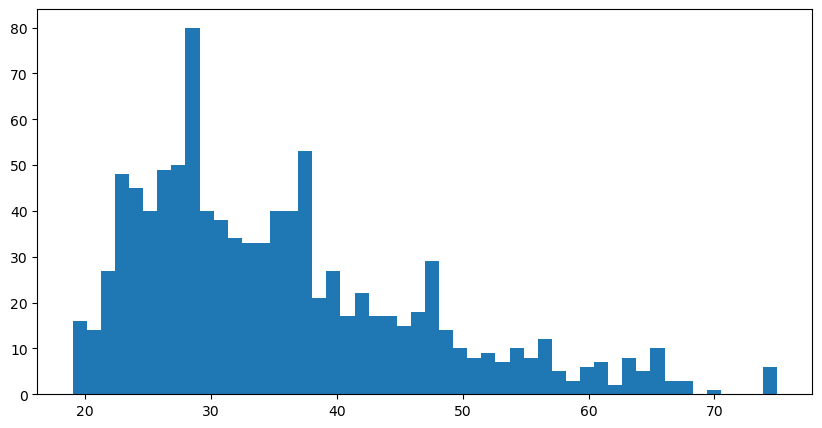

In [4]:
credit_data.age.hist(figsize=(10, 5), grid=False, bins=50)

The histograms showed distributions skewed to the left, it is visible that they have data out of range, which is yet to determine the best treatment, since they could indicate something by themselves. Although for practical purposes they should simply be removed from the preliminary analysis. Meanwhile lets create a balanced subset and standarize those continuous variables in order to do a PCA and regard only those variables that better describe our data.

In [5]:
credit_data_no, credit_data_ol = remove_outliers(credit_data, ['duration', 'amount', 'age'])
credit_data_no.shape

(862, 21)

In [6]:
credit_data_no.credit_risk.value_counts()

1    634
0    228
Name: credit_risk, dtype: int64

In [7]:
df_pca_result, pca = principal_components_analysis(credit_data_no)
representative_columns = get_representative_vars_by_pca(credit_data_no, pca)

print(f'Variables que mejor explican la varianza: {representative_columns}')
print(len(representative_columns))

Variables que mejor explican la varianza: Index(['amount', 'duration', 'installment_rate', 'age', 'property', 'job',
       'telephone', 'savings', 'purpose', 'present_residence',
       'credit_history', 'number_credits', 'people_liable', 'status',
       'housing', 'personal_status_sex', 'other_debtors', 'credit_risk',
       'foreign_worker', 'employment_duration', 'other_installment_plans'],
      dtype='object')
21



The categorical variables that best explain the variance are 'installment_rate' and 'property', so the strata will be based on these properties, in such a way that the greatest variance is what directs the stratification

¿Cuánta varianza se está explicando con estas variables? ¿Se debería aumentar? ¿Podría tener algo qué ver el P-value?

In [8]:
subsample = create_balanced_sample(credit_data_no, ['installment_rate', 'property'], 500)
subsample = assign_categorical_levels(subsample)
subsample.credit_risk.value_counts()

good    500
bad     500
Name: credit_risk, dtype: int64

In [9]:
t_statistic, p_value = verify_sample_belongs_to_population(credit_data_no[['duration', 'amount', 'age']], subsample[['duration', 'amount', 'age']])
p_value

It can be seen that the sample obtained still has a probability of belonging to the original sample.

In [11]:
subsample = standardize_continuous_variables(subsample, ['duration', 'amount', 'age'])

In [12]:
subsample.describe()

,duration,amount,age
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.545741e-16,7.494005e-17,3.381739e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.755162e+00,-1.353154e+00,-1.515068e+00
25%,-7.954016e-01,-7.500468e-01,-8.002207e-01
50%,-7.558114e-02,-2.994830e-01,-1.874943e-01
75%,6.442393e-01,5.106484e-01,5.528835e-01
max,2.803701e+00,3.141882e+00,3.080380e+00
